In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv('/content/cleanedV2.csv')

In [23]:
# Display the first few rows of the dataframe
df.head()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills,city,state_province,country
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN,Mountain View,California,United States
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",Bloomington,Indiana,United States
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",Bloomington,Indiana,United States
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",Bloomington,Indiana,United States
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce...",Greater Bloomington Area,NaN,NaN


In [24]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       12894 non-null  object
 1   company         12894 non-null  object
 2   job_location    12894 non-null  object
 3   job_link        12894 non-null  object
 4   first_seen      12894 non-null  object
 5   search_city     12894 non-null  object
 6   search_country  12894 non-null  object
 7   job level       12894 non-null  object
 8   job_type        12894 non-null  object
 9   job_summary     12851 non-null  object
 10  job_skills      12705 non-null  object
 11  city            12597 non-null  object
 12  state_province  11668 non-null  object
 13  country         12523 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


In [38]:
# Summary statistics
df.describe(include='all')

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills,city,state_province,country
count,12894,12894,12894,12894,12894,12894,12894,12894,12894,12851,12894,12894,12894,12894
unique,6797,5283,2446,12894,1,834,4,2,3,11163,12697,2158,90,6
top,Business Analyst,ClearanceJobs,United States,https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Hollywood,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,Unknown,Unknown,Unknown,United States
freq,438,238,247,1,12894,150,10386,9691,6670,97,189,297,1226,10099


In [26]:
# Handling missing values
df['job_skills'] = df['job_skills'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')
df['state_province'] = df['state_province'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

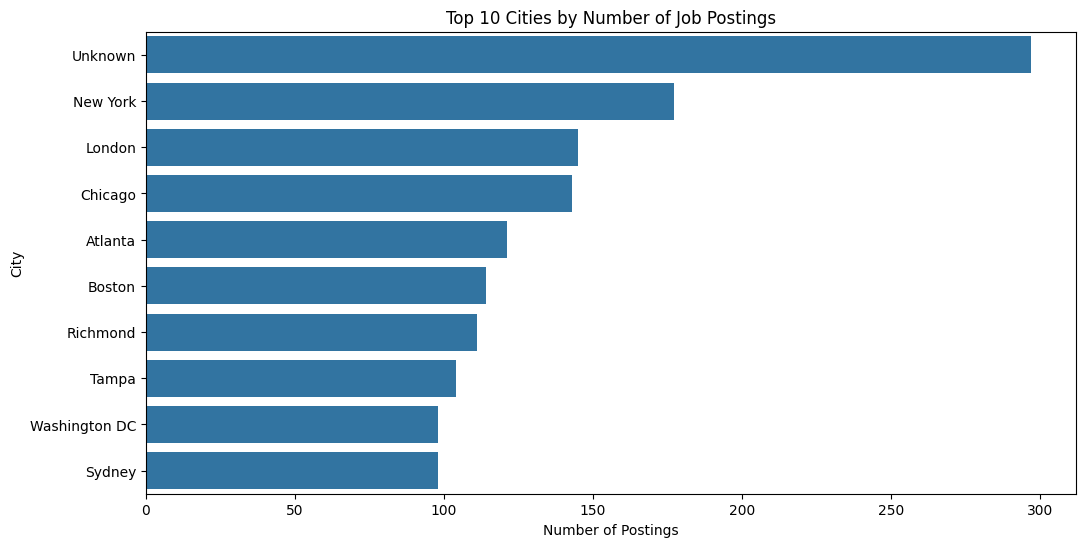

In [27]:
# Distribution of job postings by location (Top 10 cities)
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Number of Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('City')
plt.show()

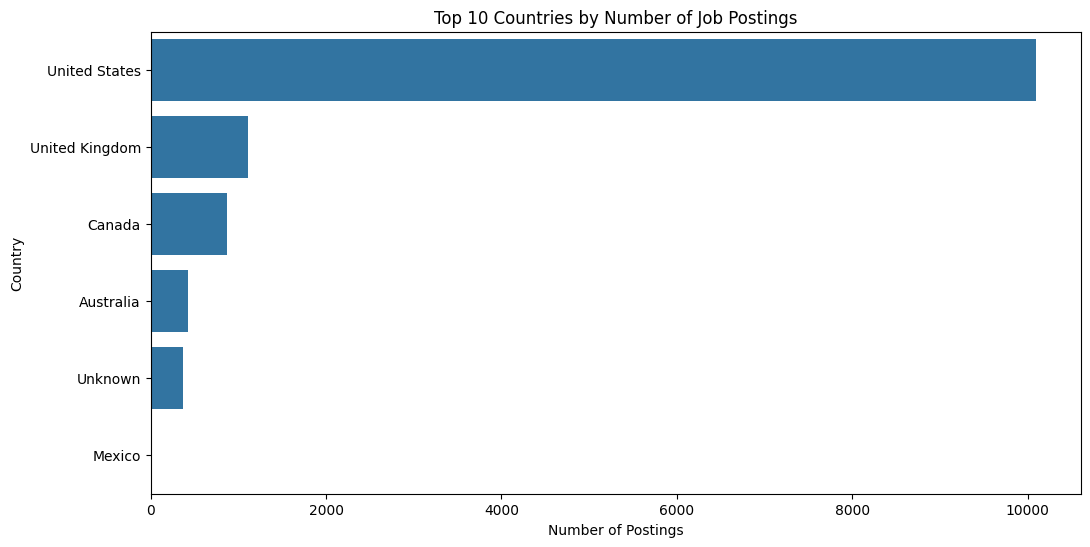

In [28]:
# Distribution of job postings by country
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Country')
plt.show()

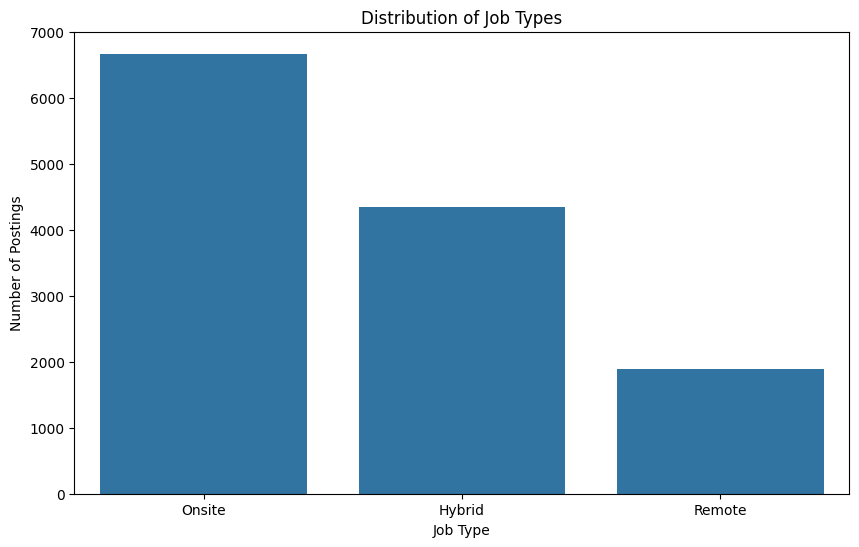

In [29]:
# Job type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', data=df, order=df['job_type'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')
plt.show()

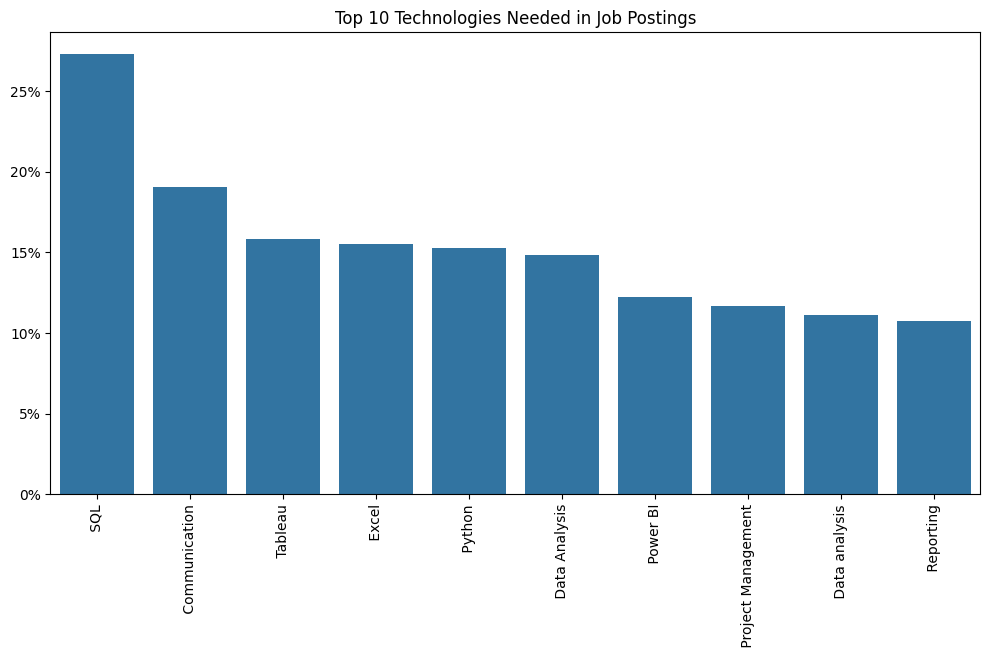

In [30]:
# Bar graph of technologies needed as a percentage of job postings (top 10 results)
total_jobs = len(df)
skills_series = df['job_skills'].str.split(',').explode().value_counts()
skills_percentage = (skills_series / total_jobs) * 100

# Select top 10 technologies
top_10_skills = skills_percentage.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_skills.index, y=top_10_skills.values)
plt.xticks(rotation=90)
plt.title('Top 10 Technologies Needed in Job Postings')
plt.xlabel('')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.show()

In [31]:
# Assuming df is your DataFrame containing job postings and job_skills column
total_jobs = len(df)
skills_series = df['job_skills'].str.split(',').explode().value_counts()
skills_percentage = (skills_series / total_jobs) * 100

# Create a DataFrame with both technologies and their respective percentages
skills_df = pd.DataFrame({'Technologies': skills_percentage.index, 'Percentage': skills_percentage.values})

In [32]:
skills_df

,Technologies,Percentage
0,SQL,27.291764
1,Communication,19.055375
2,Tableau,15.836823
3,Excel,15.487824
4,Python,15.247402
...,...,...
55257,Data Collection Methodologies,0.007756
55258,Audit Handling,0.007756
55259,Healthcare Manufacturing,0.007756
55260,VisionPlus,0.007756


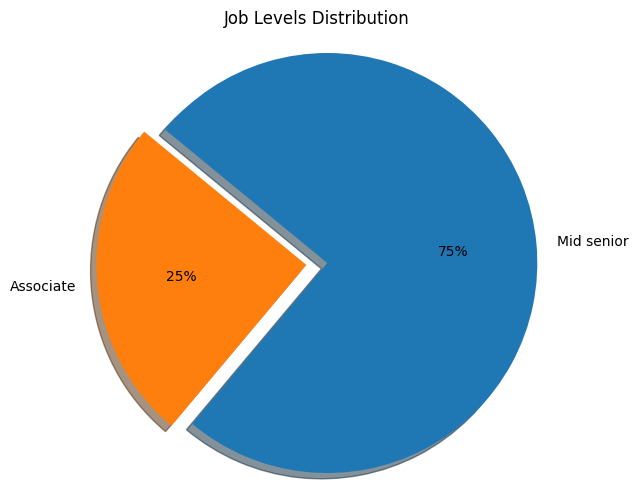

In [33]:
# Pie chart of job levels
job_level_series = df['job level'].value_counts()

# Define explode values
explode = [0.1 if i == job_level_series.idxmax() else 0 for i in job_level_series.index]

plt.figure(figsize=(6, 6))
plt.pie(job_level_series, labels=job_level_series.index, autopct='%1.0f%%', startangle=230, explode=explode, shadow=True)
plt.title('Job Levels Distribution')
plt.axis('equal')
plt.show()